In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from tp_perceptron_source import *
from sklearn import preprocessing 

%matplotlib inline

In [2]:
df1 = pd.read_csv('90_sans_synopsys_2015.csv')
df2 = pd.read_csv('90_sans_synopsys_2014.csv')
df3 = pd.read_csv('90_sans_synopsys_2013.csv')
df4 = pd.read_csv('90_sans_synopsys_2012.csv')
df5 = pd.read_csv('90_sans_synopsys_2011.csv')
df6 = pd.read_csv('90_sans_synopsys_2010.csv')
df7 = pd.read_csv('90_sans_synopsys_2009.csv')
df8 = pd.read_csv('90_sans_synopsys_2008.csv')

frames = [df1, df2, df3, df4, df5, df6, df7, df8]
df = pd.concat(frames)


df.head()

,movie_display_name,movie_production_year,movie_genre_display_name,movie_financial_summary_production_budget,movie_financial_summary_international_box_office,movie_annual_summary_tickets_sold,movie_video_summary_domestic_dvd_units,movie_acting_role_display_name,movie_theatrical_release_release_date,movie_creative_type_display_name,movie_production_method_display_name,movie_source_display_name,movie_running_time,movie_technical_role_display_name,movie_production_company_display_name,movie_sequel
0,Jurassic World,2015,Action,215000000,1016966151,77920909,1109651,Chris Pratt,2015-06-12,Science Fiction,Live Action,Based on Fiction Book/Short Story,124,Colin Trevorow,Universal Pictures,1
1,Ant-Man,2015,Action,130000000,338400000,21522460,NaN,Paul Rudd,2015-07-17,Super Hero,Live Action,Based on Comic/Graphic Novel,117,Peyton Reed,Marvel Studios,0
2,The Age of Adaline,2015,Drama,30000000,17703764,5093163,264813,Blake Lively,2015-04-24,Fantasy,Live Action,Original Screenplay,112,Lee Toland Krieger,Sidney Kimmel Entertianment,0
3,Nie yin niang,2015,Drama,15000000,6200000,71129,NaN,Zhou Yun,2015-08-27,Historical Fiction,Live Action,Remake,107,Hou Hsiao-hsien,SpotFilms,0
4,Mad Max: Fury Road,2015,Action,150000000,219500000,18355597,830010,Tom Hardy,2015-05-15,Science Fiction,Live Action,Original Screenplay,120,George Miller,Kennedy Miller Mitchell Productions,1


In [3]:
df['ROI'] = df['movie_financial_summary_international_box_office'] - df['movie_financial_summary_production_budget']

len(df)

720

In [4]:
#df['real_score'] = df['movie_production_year']*0.
#df['actor_score'] = df['movie_production_year']*0.

df.head()

,movie_display_name,movie_production_year,movie_genre_display_name,movie_financial_summary_production_budget,movie_financial_summary_international_box_office,movie_annual_summary_tickets_sold,movie_video_summary_domestic_dvd_units,movie_acting_role_display_name,movie_theatrical_release_release_date,movie_creative_type_display_name,movie_production_method_display_name,movie_source_display_name,movie_running_time,movie_technical_role_display_name,movie_production_company_display_name,movie_sequel,ROI
0,Jurassic World,2015,Action,215000000,1016966151,77920909,1109651,Chris Pratt,2015-06-12,Science Fiction,Live Action,Based on Fiction Book/Short Story,124,Colin Trevorow,Universal Pictures,1,801966151
1,Ant-Man,2015,Action,130000000,338400000,21522460,NaN,Paul Rudd,2015-07-17,Super Hero,Live Action,Based on Comic/Graphic Novel,117,Peyton Reed,Marvel Studios,0,208400000
2,The Age of Adaline,2015,Drama,30000000,17703764,5093163,264813,Blake Lively,2015-04-24,Fantasy,Live Action,Original Screenplay,112,Lee Toland Krieger,Sidney Kimmel Entertianment,0,-12296236
3,Nie yin niang,2015,Drama,15000000,6200000,71129,NaN,Zhou Yun,2015-08-27,Historical Fiction,Live Action,Remake,107,Hou Hsiao-hsien,SpotFilms,0,-8800000
4,Mad Max: Fury Road,2015,Action,150000000,219500000,18355597,830010,Tom Hardy,2015-05-15,Science Fiction,Live Action,Original Screenplay,120,George Miller,Kennedy Miller Mitchell Productions,1,69500000


In [5]:
                
def real_scoring(name,year):
    
    mean = df[(df['movie_technical_role_display_name']==name) & \
              (df['movie_production_year']<year)]['ROI'].mean()
    
    if math.isnan(mean):
        val =  0.
    else:
        val = mean
    
    return val

def actor_scoring(name, year):
    mean = df[(df['movie_acting_role_display_name']==name) & \
              (df['movie_production_year']<year)]['ROI'].mean()
    
    if math.isnan(mean):
        val =  0.
    else:
        val = mean
    
    return val



df['real_score'] = df.apply(lambda row: real_scoring(row['movie_technical_role_display_name'], \
                    row['movie_production_year']), axis=1)

df['actor_score'] = df.apply(lambda row: actor_scoring(row['movie_acting_role_display_name'], \
                    row['movie_production_year']), axis=1)

df['actor_score_now'] =  df.apply(lambda row: actor_scoring(row['movie_acting_role_display_name'], \
                    2016), axis=1)

df['real_score_now'] =  df.apply(lambda row: real_scoring(row['movie_acting_role_display_name'], \
                    2016), axis=1)
                
print df[df['movie_technical_role_display_name']=='Francis Lawrence']

                       movie_display_name  movie_production_year  \
6   The Hunger Games: Mockingjay - Part 2                   2015   
26  The Hunger Games: Mockingjay - Part 1                   2014   
23        The Hunger Games: Catching Fire                   2013   

   movie_genre_display_name  movie_financial_summary_production_budget  \
6         Thriller/Suspense                                  160000000   
26        Thriller/Suspense                                  125000000   
23                Adventure                                  130000000   

    movie_financial_summary_international_box_office  \
6                                          296800000   
26                                         372500000   
23                                         440200000   

    movie_annual_summary_tickets_sold  movie_video_summary_domestic_dvd_units  \
6                            27541916                                     NaN   
26                           39624786      

/home/maxime/anaconda3/envs/env-python2.7/lib/python2.7/site-packages/seaborn/linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/home/maxime/anaconda3/envs/env-python2.7/lib/python2.7/site-packages/seaborn/linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "
/home/maxime/anaconda3/envs/env-python2.7/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


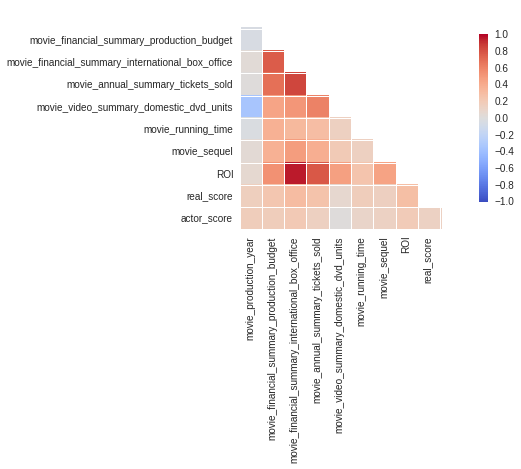

In [6]:
#sns.set(color_codes=True)
ax = sns.corrplot(df, annot=False, diag_names=False)

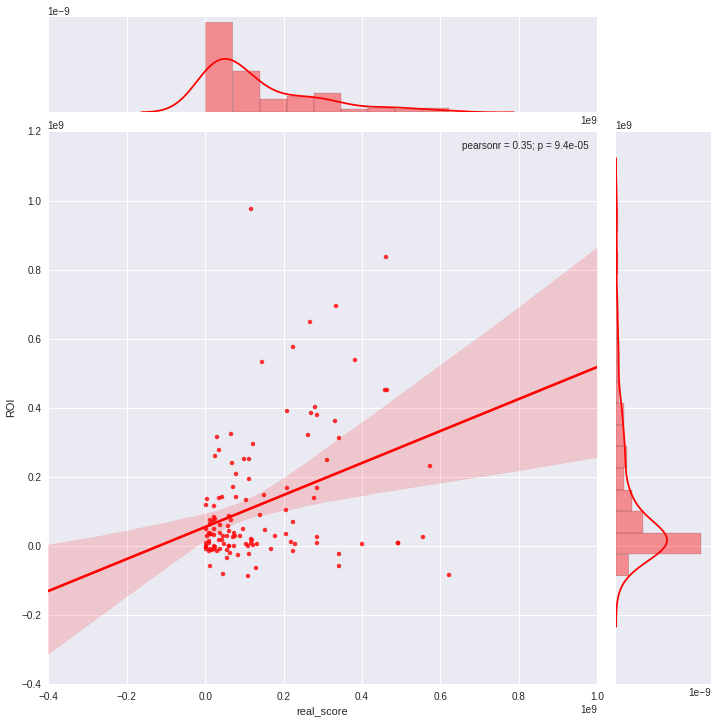

In [7]:
df_real = df[df['real_score']>0]



sns.jointplot('real_score','ROI', data=df_real, kind="reg", color="r", size=10)

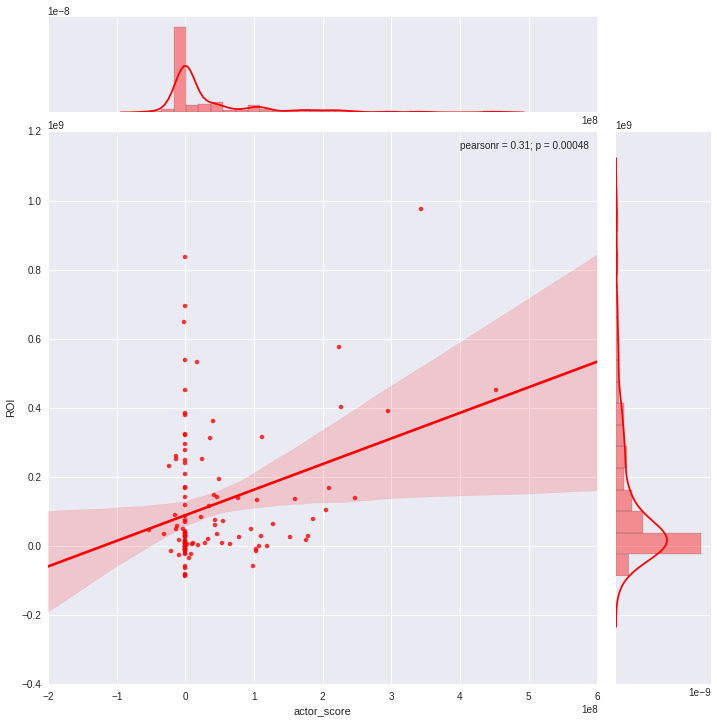

In [8]:
df_actor = df[df['actor_score']>0]
sns.jointplot('actor_score','ROI', data=df_real, kind="reg", color="r", size=10)

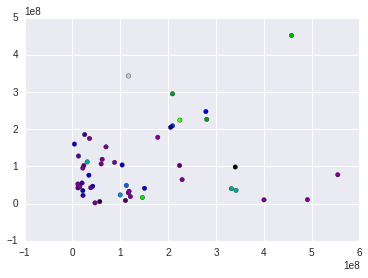

In [9]:
dfn = df[(df['real_score']>0) & (df['actor_score']>0)]

plt.scatter(dfn['real_score'].values, dfn['actor_score'].values, c=dfn['ROI'], cmap=plt.cm.spectral)

In [59]:
#dat = df[(df['real_score']>0) & (df['actor_score']>0)]
dat = df[['real_score','actor_score','ROI']]
print len(dat)

dat = dat.dropna()
print len(dat)

dat.head()

720
720


,real_score,actor_score,ROI
0,-338639,268000000,801966151
1,78300000,0,208400000
2,-155718,-13303044,-12296236
3,0,0,-8800000
4,-41050000,0,69500000


In [60]:
dat.describe()

,real_score,actor_score,ROI
count,7.200000e+02,7.200000e+02,7.200000e+02
mean,2.169848e+07,1.962281e+07,5.884810e+07
std,7.847493e+07,6.454771e+07,1.344601e+08
min,-7.055130e+07,-8.733024e+07,-1.321000e+08
25%,0.000000e+00,0.000000e+00,-8.632406e+06
50%,0.000000e+00,0.000000e+00,8.385386e+06
75%,0.000000e+00,0.000000e+00,6.316445e+07
max,6.234433e+08,6.712000e+08,9.752138e+08


[-0.28101257  3.85063789  5.5305242 ]
720
720
[ -0.28101257   3.85063789   0.07896807  -1.08207766  14.82741212]


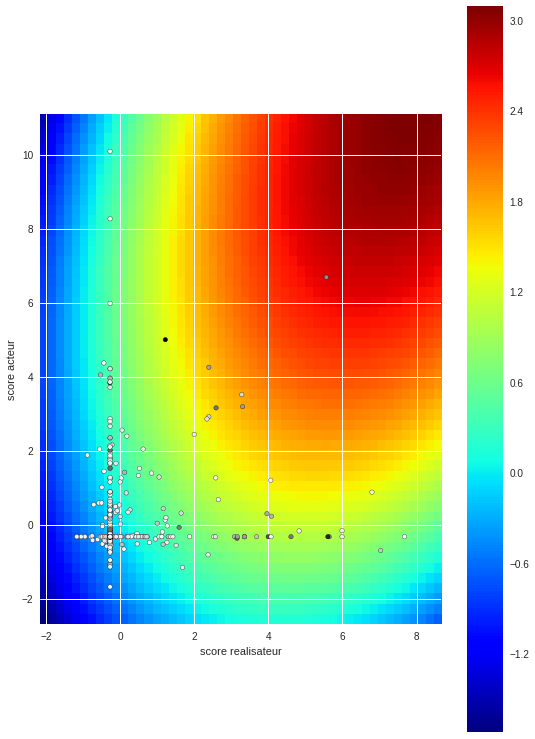

In [61]:
dat = dat.values

scaler = preprocessing.StandardScaler(with_mean=True).fit(dat)
dat = scaler.transform(dat)

print dat[0,:]


epsilon = 0.03
niter = 300

dataX = dat[:, :2]
print len(dataX)
dataY = dat[:, 2]

proj = poly2
dataXX = proj(dataX)
print len(dataXX)
print dataXX[0,:]

#w_ini = np.random.randn(niter, dataXX.shape[1] + 1)


from sklearn import linear_model

#clf = linear_model.SGDClassifier(epsilon=epsilon, n_iter=n_iter,)
#clf = linear_model.Ridge(alpha = .5)
clf = linear_model.RidgeCV(alphas = np.logspace(-9, 0, 15))
clf.fit(dataXX, dataY)


plt.ion()
plt.clf()
plt.figure(figsize=(9,13))
#plot_2d(dataX, dataY)
plt.scatter(dataX[:,0],dataX[:,1],c=dataY)
frontiere(lambda xx: clf.predict(proj(xx)), dataX)
plt.xlabel('score realisateur')
plt.ylabel('score acteur')
plt.draw()
plt.show()

In [7]:
actor = df.sort('actor_score_now',ascending=False)
actor = actor[['movie_acting_role_display_name','actor_score_now']]

actor.head()

/home/maxime/anaconda3/envs/env-python2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,movie_acting_role_display_name,actor_score_now
2,Josh Herdman,835500000
31,Jennifer Saunders,752355166
7,Claudia Kim,695700000
29,Ray Romano,623443294
72,Timothy Spall,539300000


In [8]:
real = df.sort('real_score_now',ascending=False)
real = real[['movie_technical_role_display_name','real_score_now']]

real.head()

/home/maxime/anaconda3/envs/env-python2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,movie_technical_role_display_name,real_score_now
2,Eric Darnell,327517841.5
38,Guillermo Del Toro,69213626.5
59,Seth MacFarlane,69213626.5
66,Jon Avnet,62211974.0
78,Scott Mann,62211974.0
